In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
print(city_df.columns)
print(ride_df.columns)

# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, on="city", how="outer")
# Display the data table for preview
merge_df.head()

Index(['city', 'driver_count', 'type'], dtype='object')
Index(['city', 'date', 'fare', 'ride_id'], dtype='object')


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Show city types
#print(merge_df["type"].unique())

# Check rows for missing data 
#print(merge_df.count())

# Filter data by city type
urban_df = merge_df.loc[merge_df["type"] == "Urban",:]
suburban_df = merge_df.loc[merge_df["type"] == "Suburban",:]
rural_df = merge_df.loc[merge_df["type"] == "Rural",:]

# Calculate total number of rides per city (x values)
urban_ride_counts = urban_df["city"].value_counts()
suburban_ride_counts = suburban_df["city"].value_counts()
rural_ride_counts = rural_df["city"].value_counts()

# Group by city
group_urban_df = urban_df.groupby(["city"])
group_suburban_df = suburban_df.groupby(["city"])
group_rural_df = rural_df.groupby(["city"])

# Calculate average fare per city (y values)
urban_average_fare = ((group_urban_df["fare"].sum())/urban_ride_counts)
suburban_average_fare = ((group_suburban_df["fare"].sum())/suburban_ride_counts)
rural_average_fare = ((group_rural_df["fare"].sum())/rural_ride_counts)

# Calculate driver count per city
urban_driver_count = (group_urban_df["driver_count"].sum())
suburban_driver_count = (group_suburban_df["driver_count"].sum())
rural_driver_count = (group_rural_df["driver_count"].sum())

# Total Fares
urban_fares = (urban_df["fare"].sum())
suburban_fares = (suburban_df["fare"].sum())
rural_fares = (rural_df["fare"].sum())

# Total Rides
urban_rides = len(urban_df["ride_id"])
suburban_rides = len(suburban_df["ride_id"])
rural_rides = len(rural_df["ride_id"])

# Total Drivers
urban_drivers = urban_driver_count.sum()
suburban_drivers = suburban_driver_count.sum()
rural_drivers = rural_driver_count.sum()

# Obtain max for average fares
#print((urban_average_fare).max())
#print((suburban_average_fare).max())
#print((rural_average_fare).max())

# Obtain max for total rides 
#print((urban_ride_counts).max())
#print((suburban_ride_counts).max())
#print((rural_ride_counts).max())

# Obtain min for average fares
#print((urban_average_fare).min())
#print((suburban_average_fare).min())
#print((rural_average_fare).min())

# Obtain min for total rides 
#print((urban_ride_counts).min())
#print((suburban_ride_counts).min())
#print((rural_ride_counts).min())

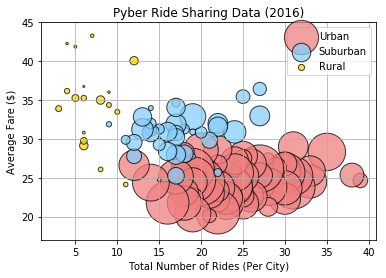

In [3]:
# Maximum x value
x_limit = 45

# List of values from 0 to 45
x_axis = np.arange(0, x_limit, 5)

# The y limits for plot
plt.ylim(17,45)

# Scatter Plot
plt.scatter(urban_ride_counts, urban_average_fare, marker="o", facecolors="lightcoral", edgecolors="black", 
           s=urban_driver_count, alpha=0.75, label="Urban")

plt.scatter(suburban_ride_counts, suburban_average_fare, marker="o", facecolors="lightskyblue", edgecolors="black", 
           s=suburban_driver_count, alpha=0.75, label="Suburban")

plt.scatter(rural_ride_counts, rural_average_fare, marker="o", facecolors="gold", edgecolors="black", 
           s=rural_driver_count, alpha=0.75, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid()
plt.savefig("ride_sharing_data")
plt.show()

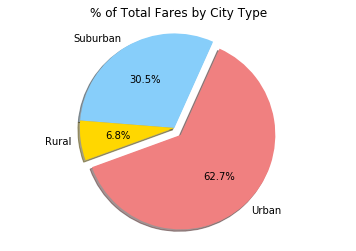

In [4]:
# Pie chart for Total Fairs by City Type
labels = ["Urban", "Suburban", "Rural"]

sizes = [urban_fares, suburban_fares, rural_fares]

colors = ["lightcoral", "lightskyblue", "gold"]

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.savefig("total_fares.png")
plt.show()

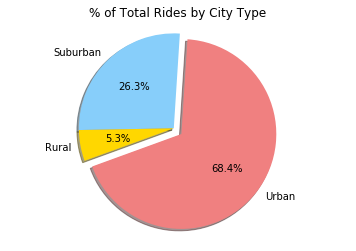

In [5]:
# Total Rides by City Type
labels = ["Urban", "Suburban", "Rural"]

sizes = [urban_rides, suburban_rides, rural_rides]

colors = ["lightcoral", "lightskyblue", "gold"]

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.savefig("total_rides.png")
plt.show()

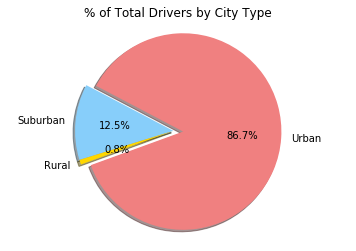

In [6]:
# Total Drivers by City Type
labels = ["Urban", "Suburban", "Rural"]

sizes = [urban_drivers, suburban_drivers, rural_drivers]

colors = ["lightcoral", "lightskyblue", "gold"]

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.savefig("total_drivers")
plt.show()